## Tema 3. Identificación de sistemas

Ejemplos de identificación de sistemas empleando Python.

## Ejemplo circuito RC.

Supongamos un circuito RC, con $R = 1$ $\Omega$ y $C = 1$ F y un periodo de muestreo $T = 100$ ms. A partir del ejemplo visto en el tema 2, calculamos el valor de $\alpha$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

En primer lugar, simulamos la respuesta del sistema discreto:

In [14]:
R = 1
C = 1
T = 1e-1
a = T/(R*C+T)
N = 50  # Número de muestras
x = np.ones(N)  # Entrada escalón unitario
y = np.zeros(N)  # Inicialización de la salida

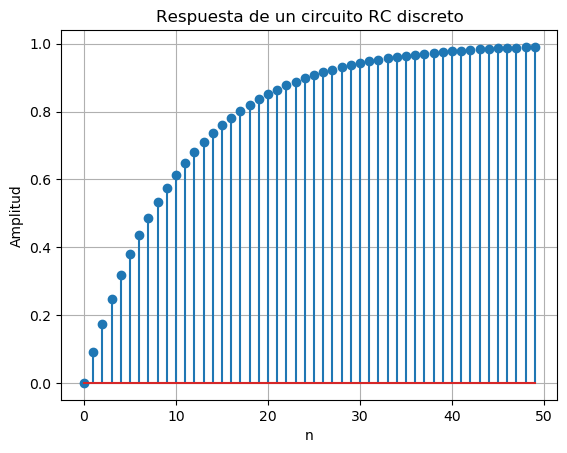

In [15]:
# Ecuación en diferencias
y[0] = 0  # Condición inicial
for n in range(1, N):
    y[n] = (1 - a) * y[n-1] + a * x[n]


# Graficar
plt.stem(range(N), y, use_line_collection=True)
plt.title("Respuesta de un circuito RC discreto")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

Calculamos por mínimos cuadrados los parámetros de la ecuación en diferencias:

In [39]:
Phi = np.transpose( np.array([y[:-1],x[:-1]]) )
theta = np.dot( np.matmul( np.linalg.inv( np.matmul( np.transpose(Phi),Phi ) ), np.transpose(Phi) ), y[1:])
 

Comprobamos:

In [40]:
print(theta)
print(1-a,a)

[0.90909091 0.09090909]
0.9090909090909091 0.09090909090909091


También es posible emplear directamente la función de ``numpy``que calcula la pseudoinversa:

In [43]:
np.dot( np.linalg.pinv(Phi),y[1:] )

array([0.90909091, 0.09090909])

¿Qué pasará si añadimos ruido a la señal?

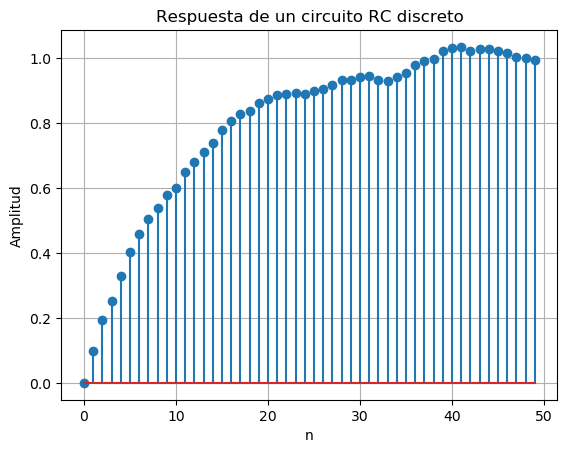

In [48]:
# Ecuación en diferencias
y[0] = 0  # Condición inicial
for n in range(1, N):
    y[n] = (1 - a) * y[n-1] + a * x[n] + 0.01*np.random.normal()


# Graficar
plt.stem(range(N), y, use_line_collection=True)
plt.title("Respuesta de un circuito RC discreto")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

In [56]:
Phi = np.transpose( np.array([y[:-1],x[:-1]]) )
theta = np.dot( np.linalg.pinv(Phi),y[1:] )
a1 = theta[1]
print(theta)

[0.90687643 0.09386305]


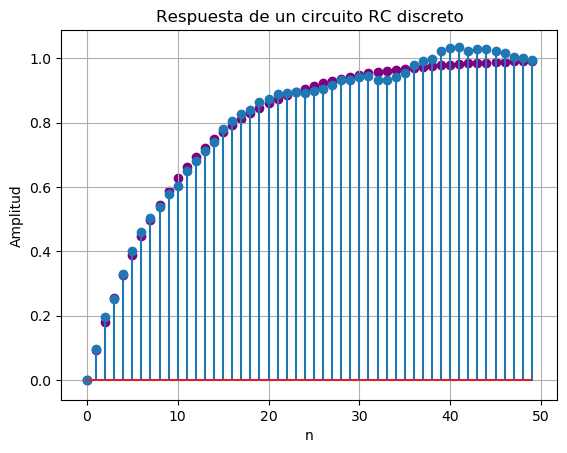

In [65]:
y1 = np.zeros(N)  # Inicialización de la salida
# Ecuación en diferencias
y1[0] = 0  # Condición inicial
for n in range(1, N):
    y1[n] = (1 - a1) * y1[n-1] + a1 * x[n]


# Graficar
plt.stem(range(N), y, use_line_collection=True)
plt.scatter(range(N), y1,color='purple')
plt.title("Respuesta de un circuito RC discreto")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

## Ejemplo ejercicio identificación

Se desea identificar el modelo discreto de un sistema donde se ha medido la siguiente respuesta a la señal de entrada.

Entrada: $ u_k = \left\{ 0, 0.5, 1, 0.5, 0, 0.5, 1, 0.5, 0 \right\} $
Salida: $ y_k =  \left\{ 0, 0, 0.25, 0.375, -0.2625, -0.6821, 0.1194